### Python EDA FINAL PROJECT

By now you should be comfortable with working on an end to end Exploratory Data Analysis in Python. For this final assignment/project, we would like you to study and pick a dataset from one of the links below. Treat the project as a business case and solve the problem. A total of **100 points** is allocated to this project.

**Datasets chosen:**

Food Chain Campaign( a bit more on statistics): https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test


**Reference:** 

1. Typical 8-Step A/B Test Workflow for Data Scientists in 2022: https://towardsdatascience.com/typical-9-step-a-b-test-workflow-for-data-scientists-in-2022-d672c9a0d658
1. 5 workflow of A B testing: https://fastercapital.com/content/Why-A-B-testing-is-essential-for-startups-that-want-to-be-agile.html
1. A/B Testing a Fast Food Chain's Marketing Campaigns: https://vijayravi.blog/blog/f/ab-testing-a-fast-food-chains-marketing-campaigns
1. The Three Most Important Statistical Tests in Business Analytics:
https://towardsdatascience.com/the-three-most-important-statistical-tests-in-business-analytics-fd958a8e2a90
1. How to Use Chi Square to Fuel A/B Test?: https://www.analyticsvidhya.com/blog/2023/06/how-to-use-chi-square-to-fuel-a-b-test/
1. A/B Testing for Business Analysts: https://www.udacity.com/course/ab-testing--ud979

**Rubric as below:**

| Section           | Criteria                                                                                                     | Points |
|-------------------|--------------------------------------------------------------------------------------------------------------|--------|
| Project Scope     | Is the project goals and objectives mentioned?                                                               | 5      |
| Analysis          | Data is cleaned and transformed properly                                                                     | 5      |
|                   | Basic metadata exploration and data columns to variable type have been mapped out clearly                   | 5      |
|                   | At least 10 questions are asked and these are related to the business case                                   | 5      |
|                   | The student has analyzed the data using univariate analysis and written his insights                         | 5      |
|                   | The student has analyzed the data using bivariate analysis and written his insights                           | 5      |
|                   | The student has analyzed the data using multivariate analysis and written his insights                         | 5      |
|                   | The student has used the correct charts and plots for each type of analysis and interpreted them correctly. At least three charts for each type of analysis | 10     |
|                   | The student has used different elements to describe the graph(labels for each axis, legend if required, title, aesthetics - styles, colors, size, etc.) | 5      |
|                   | Use of statistics - Measures of central tendency (mean, median, mode, quartiles), spread (standard deviation, variance, range, IQR), Shape (Kurtosis, Skewness, and Modality), and Frequencies, Co-occurrences, and/or other statistical analysis method | 5      |
| Code Quality      | No errors produced while running the notebook, code is readable                                              | 10     |
| Overall conclusions| At least 3 important insights and final conclusions are included.                                           | 20     |
|                   | The insights should be interesting enough instead of just out of common sense.                              |        |
|                   | The conclusions are drawn logically and reasonably without logic fallacy                                    | 5      |
|                   | The project included potential actions or next steps that could be taken, based on the analysis                | 10     |


### Hypothesis:

(Note: see if sales of first half of month = second half of the month)

**Demographic Insights**
1. Does a correlation exist between age of store and Sales?
1. Does a correlation exist between market size and Sales?
1. Which age group of store has the highest sales?
1. Which market size categories (small, medium, large) yields the highest sales for the business, and where should the business focus its efforts?

**Location and Sales Analysis**
1. How many locations the business is selling fast food?
1. Which location has the highest sales? Which location do we need to focus on?
1. Is the concentration of business sales disproportionately high in specific locations, such as the top 10 sales locations?

**Marketing strategy**
1. Which promotion strategy is employed most frequently?
1. How promotion strategy is in different market size categories?
1. Does the most-employed promotion strategy brings the highest sales? Which promotion strategy we should focus on?
1. Do businesses require distinct marketing strategies based on variations in market size they have in each location, and if so, how do these strategies differ between small, medium, and large markets? (Tips: chi-square, e.g., https://www.smarten.com/blog/chi-square-test-association-analysis/)
1. (?) What are the key factors influencing the effectiveness of marketing approaches in markets of different sizes?

---------------------------------------------------------

# Fast Food Marketing Campaign A/B Test

**About data**

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

-----------------------

## Introduction of A/B testing

Before we dive into the case study, let's have a simple introduction to A/B testing.

A/B testing, or 'split-testing', is a robust method to check how different campaigns with different subsections of an audience. For example, you can evaluate the effectiveness of Campaign A with one portion of the audience and Campaign B with another, enabling you to allocate your marketing budget to the more successful campaign.

Here's some simple steps to [design an effective A/B testing](https://fastercapital.com/content/Why-A-B-testing-is-essential-for-startups-that-want-to-be-agile.html), and we'll apply these principles when designing this test:

<img src="./img/Workflow-of-A-B-testing.jpg" alt="A B testing workflow" width="600"/>

**1) Goals of the test:**

Analyze A/B test results to find the most effective marketing strategy among the three promotion types.

**2) Identify the variables**

Every A/B test needs an independent variable, a control variable (or control group), and a dependent variable.

- **Independent variable**: The `type of promotions` used. Marketing team is trying out 3 different ways to promote new item to figure which one is best in boosting sales.

- **Dependent Variable**: `Weeky sales` of new product

- **Control variable**: the `location` / `market`, `market size` & `store age`. This needs to be controlled to ensure that any differences in sales are due to the marketing campaign and not other external factors related to the location.

**3) Create a 'control' (Promotion 1) and a 'challenger' (Promotion 2 & Promotion 3). Test to see how the challengers compare to the control.**

- **Control group**: Promotion 1
- **Experimental group**: Promotion 2, Promotion 3 (= Challengers)

**4) Determine sample size and duration of test:**

- Sample size: 548
- Duration of the test: 4 weeks

**5) Analyze results and take action:**

Data insights to be explored and analyzed in the report below

------

## Step 0: Import needed libaries

In [2]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr

warnings.filterwarnings(action="ignore")


In [3]:
!python --version

Python 3.9.0


In [4]:
!pip --version

pip 23.1.2 from C:\Users\yongsheng.tan\AppData\Local\miniconda3\envs\quant_lab\lib\site-packages\pip (python 3.9)



In [5]:
%matplotlib inline

### Step 1: Data Cleaning

In [6]:
df = pandas.read_csv("WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [7]:
# change data type of dataframe
category_variable = ["MarketID", "MarketSize", "LocationID","Promotion","week"]

df2 = df.copy()
df2[category_variable] = df2[category_variable].astype("category")

In [8]:
# check data type of each variables
print(df2.dtypes)

MarketID            category
MarketSize          category
LocationID          category
AgeOfStore             int64
Promotion           category
week                category
SalesInThousands     float64
dtype: object


In [9]:
# are there any missing values in the datasets?
print(df2.isna().sum())

print("\nThere is no missing values in this dataset.")

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

There is no missing values in this dataset.


In [10]:
# Are there any row of records duplicated in the dataset?
print(f"There is {df2.duplicated().sum()} row(s) duplicated.")

There is 0 row(s) duplicated.



Handling Outliers in dataset
------------------------------      
Some promotions have a few sales outliers, 
and I've decided to keep them in our dataset. 
It's because these outliers are genuine and not 
the result of errors in observation or calculation.



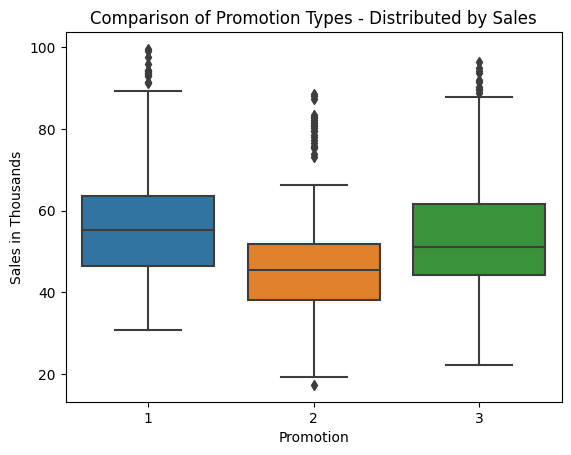

In [174]:
# Are there any outliers for sales column in this dataset?  
sns.boxplot(x="Promotion", y="SalesInThousands", data=df2)
plt.ylabel("Sales in Thousands")
plt.title("Comparison of Promotion Types - Distributed by Sales")

print("""
Handling Outliers in dataset
------------------------------      
Some promotions have a few sales outliers, 
and I've decided to keep them in our dataset. 
It's because these outliers are genuine and not 
the result of errors in observation or calculation.
""")

### Step 2: Study and check the data

How many observations in the dataset?

In [128]:
print(df2.shape[0])

548


How many markets available for product selling?

In [130]:
print(df2["MarketID"].nunique())

10


How many locations available for product selling?

In [131]:
print(df2["LocationID"].nunique())

137


What's mean age of store, along with its minimum and maximum values?

In [140]:
print("Mean: %.4f years" % df2['AgeOfStore'].mean())
print("Min: %.4f years" % df2['AgeOfStore'].min())
print("Max: %.4f years" % df2['AgeOfStore'].max())

Mean: 8.5036 years
Min: 1.0000 years
Max: 28.0000 years


How many types of promotions were employed for this A/B testing?

In [132]:
print(df2["Promotion"].nunique())

3


What was the duration of the A/B test?

In [135]:
print(df2["week"].unique())
print("\nIt's around 4 weeks")

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

It's around 4 weeks


What is the total sales amount over the four weeks?

In [168]:
print("$ {:,.0f}".format(df2["SalesInThousands"].sum() * 1000))

$ 29,299,480


Dataset summary

In [133]:
print("""Description of the dataset
=============================
There are a total of 548 observations in the dataset.
      
- MarketID: Market type (-> 10 unique markets)
- MarketSize: size of market area by sales (small, medium, large)
- LocationID: store location's unique identifier (-> 137 unique locations)
- AgeOfStore: age of store in years (1 - 28)
- Promotion: Promotion type (1-3)
- week: Week number (1-4) 
- SalesInThousands: sales amount for a specific LocationID, Promotion and week 

""")

Description of the dataset
There are a total of 548 observations in the dataset.
      
- MarketID: Market type (-> 10 unique markets)
- MarketSize: size of market area by sales (small, medium, large)
- LocationID: store location's unique identifier (-> 137 unique locations)
- AgeOfStore: age of store in years (1 - 28)
- Promotion: Promotion type (1-3)
- week: Week number (1-4) 
- SalesInThousands: sales amount for a specific LocationID, Promotion and week 




### Step 3: Descriptive Analysis

i. What are total sales over 4 weeks?

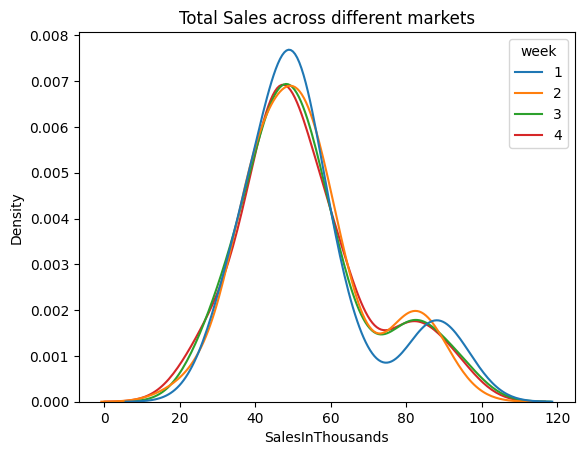

In [184]:
# Sales across different markets
#sales_by_week = df2.groupby("week")[
#    "SalesInThousands"].sum().reset_index().sort_values(
#                ascending=False, by="SalesInThousands")
#sales_by_week["week"] = sales_by_week["week"].astype("str")

df3 = df2.copy(deep=True)
df3["week"] = df3["week"].astype(str)
ax = sns.kdeplot(hue="week", x="SalesInThousands",
            data=df3)
            #color="blue", alpha=0.6)
#ax.bar_label(ax.containers[0])
plt.title("Total Sales across different markets")
plt.show()

ii. What are total sales across different markets?

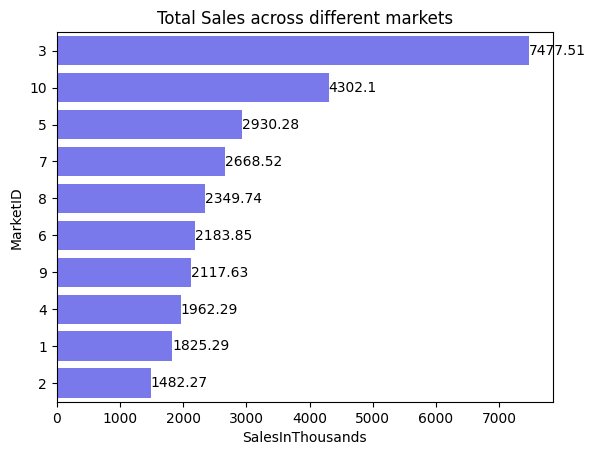

In [157]:
# Sales across different markets
sales_by_location = df2.groupby("MarketID")[
    "SalesInThousands"].sum().reset_index().sort_values(
                ascending=False, by="SalesInThousands")
sales_by_location["MarketID"] = sales_by_location["MarketID"].astype("str")
ax = sns.barplot(x="SalesInThousands", y="MarketID",
            data=sales_by_location,
            color="blue", alpha=0.6)
ax.bar_label(ax.containers[0])
plt.title("Total Sales across different markets")
plt.show()

iii. What are sales across different locations?

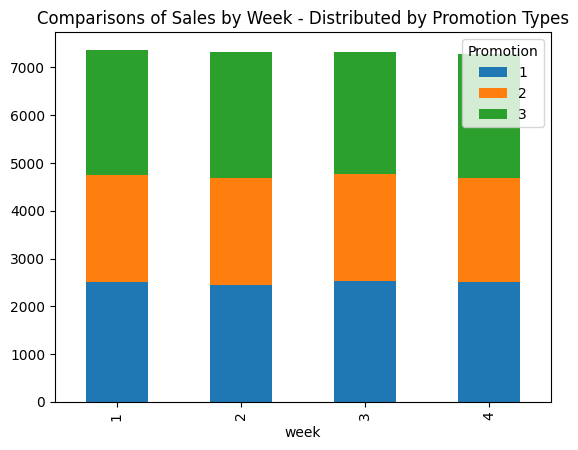

In [167]:
# Comparison
ax = pandas.crosstab(index=df2["week"],
                columns=df2["Promotion"],
                values=df2["SalesInThousands"],
                aggfunc=sum).plot(kind="bar", stacked=True)
plt.title("Comparisons of Sales by Week - Distributed by Promotion Types")

plt.show()

All three control and experiment groups appear to have a similar 
number of promotions implemented across various market sizes.



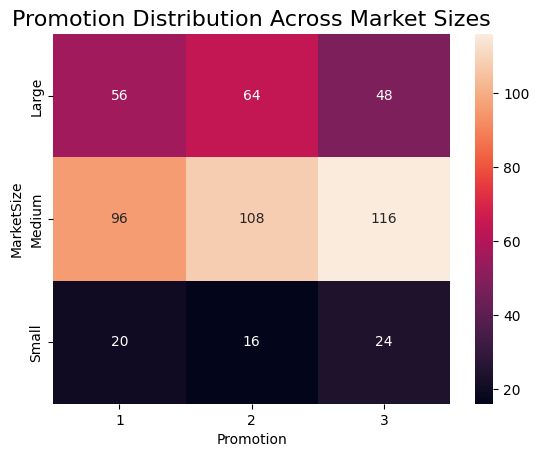

In [ ]:
# (??)

print("""All three control and experiment groups appear to have a similar 
number of promotions implemented across various market sizes.
""")

promotion_across_market_sizes = pandas.crosstab(df2["MarketSize"], 
                            df2["Promotion"])
sns.heatmap(promotion_across_market_sizes, annot=True,
            fmt=".4g")
plt.title("Promotion Distribution Across Market Sizes", 
          fontsize=16)
plt.show()

## Step 4: Analyze A/B testing result and take action

(i) Descriptive Analysis

(ii) A/B testing

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(df2.loc[(df2["Promotion"] == 1) & (df2["MarketSize"]=="Large"), "SalesInThousands"],
         df2.loc[(df2["Promotion"] == 2) & (df2["MarketSize"]=="Large"), "SalesInThousands"],
         alternative="greater")

Ttest_indResult(statistic=5.21755636059224, pvalue=3.9271311020962417e-07)

## Others

### Demographic Insights

correlation coefficient: -0.0285 - Inference: Weak negative correlation strength
p value: 0.5051 - Inference: much larger than 0.01 confidence interval
Conclusion: Age 


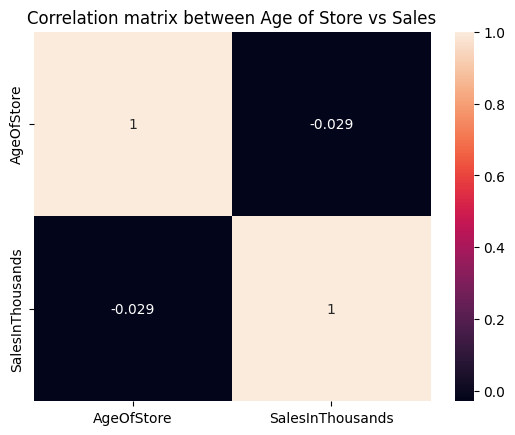

In [ ]:
# Does the correlation exist between age of store and sales?
corr = df2[["AgeOfStore", "SalesInThousands"]].corr()

# is the correlation relationship siginificant?
t_stats, p_value = pearsonr(df2["AgeOfStore"],df2["SalesInThousands"])
print(f"correlation coefficient: {round(corr.iloc[1,0],4)} - Inference: Weak negative correlation strength")
print(f"p value: {round(p_value, 4)} - Inference: much larger than 0.01 confidence interval")

print("Conclusion: Age ")

# plot correlation heatmap for age of store and sales
sns.heatmap(corr, annot=True)
plt.title("Correlation matrix between Age of Store vs Sales")
plt.show()

In [ ]:
# how many locations the business is selling fast food?
no_of_location = df2["LocationID"].nunique()
print(f"The business operates fast-food services in {no_of_location} locations.")

The business operates fast-food services in 137 locations.


Text(0.5, 1.0, "Top 10 Locations' Total Sales vs The Rest")

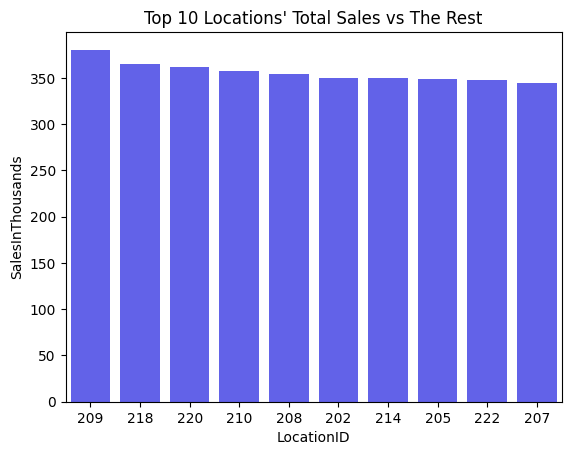

In [ ]:
# Bar chart - top 10 sales by region 
sales_by_location = df2.groupby("LocationID")[
    "SalesInThousands"].sum().reset_index()
## convert numerical variable to string type, if not the legend will show them as float variable (e.g., 202.0)
sales_by_location["LocationID"] = sales_by_location["LocationID"].astype(str)

top_10_sales_by_location = sales_by_location.sort_values(
                # we will pick top 10 sales, and because python start index from 0, so minus 10 by 1 to get 9 
                ascending=False, by="SalesInThousands").iloc[:10]

sns.barplot(x="LocationID",y="SalesInThousands", 
            data=top_10_sales_by_location,
            color="blue",
            alpha=0.7)
plt.title("Top 10 Locations' Total Sales vs The Rest")

Text(0.5, 1.0, "Top 10 Locations' Total Sales vs The Rest")

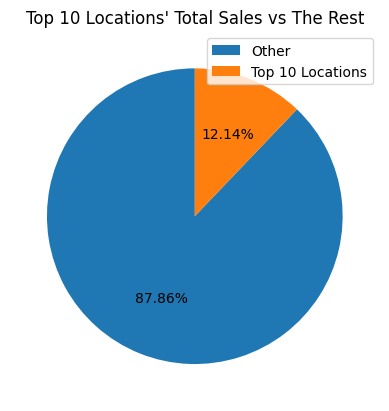

In [ ]:
# Group by location and calculate total sales
sales_by_location = df2.groupby("LocationID")["SalesInThousands"].sum().reset_index()

# Identify the top 10 locations
top_10_locations = sales_by_location.nlargest(10, "SalesInThousands")

# Label locations as "Top 10 Locations" or "Other"
sales_by_location["LocationLabel"] = numpy.where(
    sales_by_location["LocationID"].isin(top_10_locations["LocationID"]),
    "Top 10 Locations",
    "Other"
)

# Group by the labeled column and sum the sales
sales_summary = sales_by_location.groupby("LocationLabel")["SalesInThousands"].sum().reset_index()

# Plotting the pie chart
plt.pie(x=sales_summary["SalesInThousands"], autopct="%.2f%%", startangle=90, counterclock=True)
plt.legend(sales_summary["LocationLabel"], loc="upper right")
plt.title("Top 10 Locations' Total Sales vs The Rest")

Text(0.5, 1.0, "Top 10 Locations' Total Sales vs The Rest")

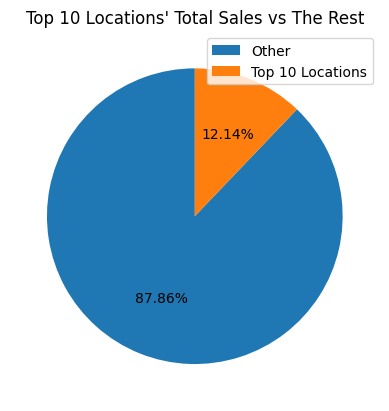

In [ ]:
# Pie Chart: Top 10 locations' sales vs 
### the location id where its sales is smaller than 
### top 10th Sales will be labelled as "Others"

sales_by_location = df2.groupby("LocationID")[
    "SalesInThousands"].sum().reset_index()
## convert numerical variable to string type, if not the legend will show them as float variable (e.g., 202.0)
sales_by_location["LocationID"] = sales_by_location["LocationID"].astype(str)

top_10th_sales_by_location = sales_by_location.sort_values(
                # we will pick top 10 sales, and because python start index from 0, so minus 10 by 1 to get 9 
                ascending=False, by="SalesInThousands")["SalesInThousands"].iloc[9]

sales_by_location["LocationID"] = sales_by_location.apply(lambda row: "Top 10 Locations" if row["SalesInThousands"] >= top_10th_sales_by_location else "Other", axis=1)
sales_by_location = sales_by_location.groupby("LocationID")["SalesInThousands"].sum().reset_index()

plt.pie(x=sales_by_location["SalesInThousands"], autopct="%.2f%%", 
        startangle=90, counterclock=True)
plt.legend(sales_by_location["LocationID"].astype(str), loc="upper right")
plt.title("Top 10 Locations' Total Sales vs The Rest")

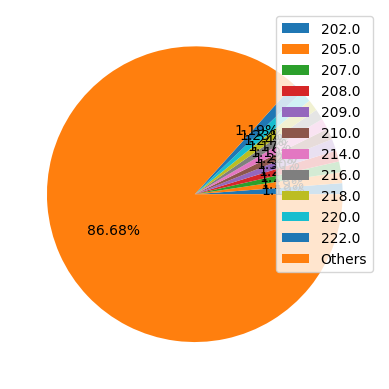

In [ ]:
# Pie Chart: Top 10 Sales by location 
### the location id where its sales is smaller than 
### top 10th Sales will be labelled as "Others"

sales_by_location = df2.groupby("LocationID")[
    "SalesInThousands"].sum().reset_index()

top_10th_sales_by_location = sales_by_location.sort_values(
                ascending=False, by="SalesInThousands")["SalesInThousands"].iloc[10] # because python start index from 0, so 10 need to minus 1 

sales_by_location["LocationID"] = sales_by_location.apply(lambda row: row["LocationID"] if row["SalesInThousands"] >= top_10th_sales_by_location else "Others", axis=1)
sales_by_location = sales_by_location.groupby("LocationID").sum().reset_index()

plt.pie(x=sales_by_location["SalesInThousands"], autopct="%.2f%%")
plt.legend(sales_by_location["LocationID"].astype(str), loc="upper right")

   week Promotion  SalesInThousands
0     1         1           2504.51
1     1         2           2243.32
2     1         3           2621.48
3     2         1           2447.97
4     2         2           2236.38
5     2         3           2629.61
6     3         1           2527.32
7     3         2           2242.94
8     3         3           2555.76
9     4         1           2513.23
10    4         2           2175.29
11    4         3           2601.67


Text(0.5, 1.0, 'Sales by Week')

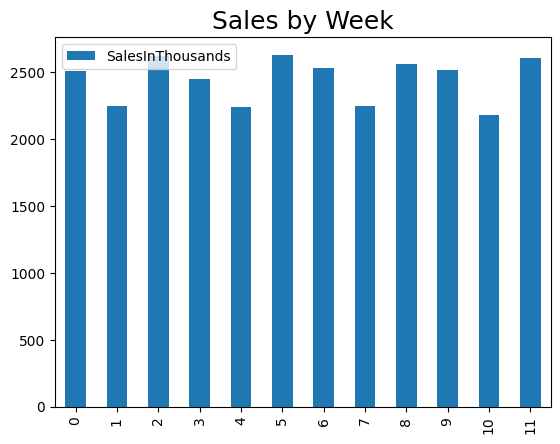

In [ ]:
# sales by week
# what lacks annotation: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

sales_by_week_and_promotion = df2.groupby(["week","Promotion"
                                        ])["SalesInThousands"].sum().reset_index()

sales_by_week_and_promotion.set_index(["week"])
print(sales_by_week_and_promotion)
sales_by_week_and_promotion.plot(kind="bar",stacked=True)
#ax.bar_label(ax.containers[0])
plt.ylim(0,)
plt.title("Sales by Week", fontsize=18)

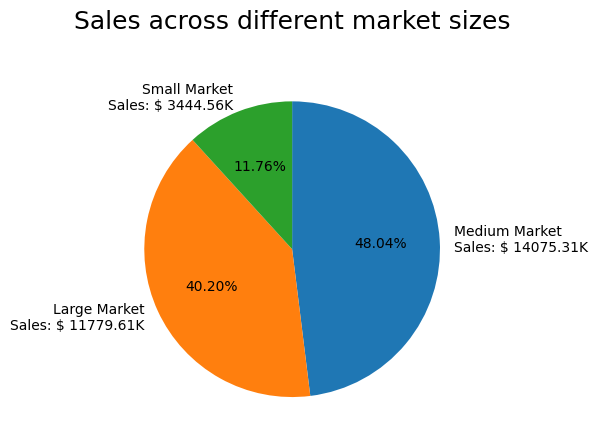

In [ ]:
# Sales across different market sizes
sales_by_market_size = df2.groupby("MarketSize")["SalesInThousands"].sum(
            ).reset_index().sort_values(by="SalesInThousands", ascending=False)

labels = sales_by_market_size["MarketSize"].astype(str) + " Market" + "\n" + "Sales: " + "$ " +\
                sales_by_market_size["SalesInThousands"].astype(str) + "K"
sizes = sales_by_market_size.index

def get_new_labels(sizes,labels):
        new_labels = [label for _, label in zip(labels, sizes)]
        return new_labels

plt.pie(sales_by_market_size["SalesInThousands"],
        startangle=90, counterclock=False, autopct="%1.2f%%",
        labels=get_new_labels(labels, sizes)) 
plt.title("Sales across different market sizes\n", fontsize=18)
plt.show()

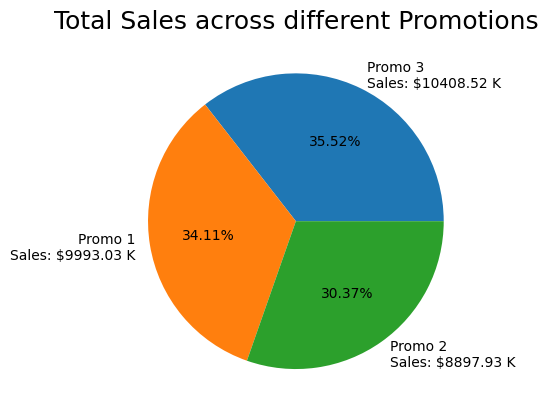

In [ ]:
# Sales across different Promotions
sales_by_promotion = df2.groupby("Promotion")["SalesInThousands"].sum(
                        ).reset_index().sort_values(by="SalesInThousands", ascending=False)

labels = "Promo " + sales_by_promotion["Promotion"].astype(str) +\
            "\n" + "Sales: $" + sales_by_promotion["SalesInThousands"].astype(str) + " K"
sizes = sales_by_promotion["Promotion"].index

def get_new_labels(labels, sizes):
    new_labels = [label for label, _ in zip(labels,sizes)]
    return new_labels

plt.pie(sales_by_promotion["SalesInThousands"], autopct="%1.2f%%",
        labels=get_new_labels(labels, sizes))

plt.title("Total Sales across different Promotions", fontsize=18)
plt.show()

Explanation:

(ii) Bivariate analysis

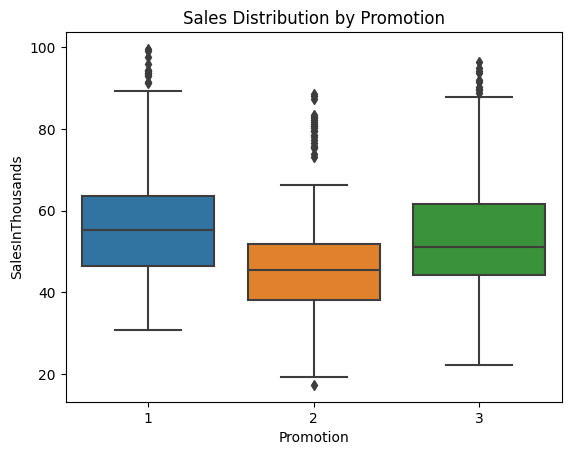

In [ ]:
# visualize sales distribution across promotions
sns.boxplot(x="Promotion",y="SalesInThousands",
            data=df2)
plt.title("Sales Distribution by Promotion")
plt.show()

(iii) Multivariate analysis

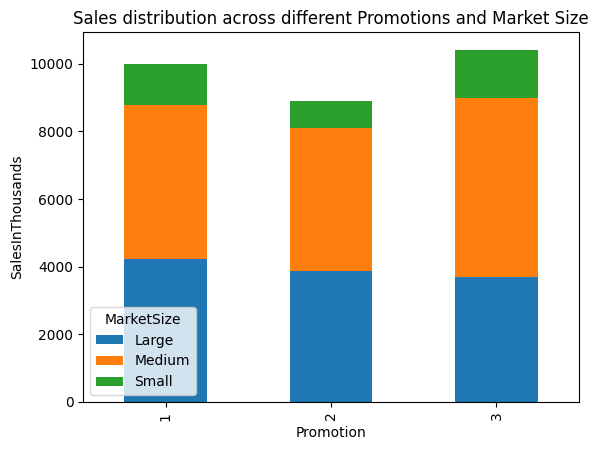

In [ ]:
# Group the DataFrame by "Promotion" and "MarketSize" and 
# calculate the sum of "SalesInThousands" for each group
pandas.crosstab(index=df2["Promotion"], 
                columns=df2["MarketSize"],
                values=df2["SalesInThousands"],
                aggfunc=sum).plot(kind="bar", stacked=True)

# plot stacked bar chart
plt.ylabel("SalesInThousands")
plt.title("Sales distribution across different Promotions and Market Size")
plt.show()

**ANOVA**

H0: u1 = u2 = u3

H1: u1 ≠ u2 ≠ u3

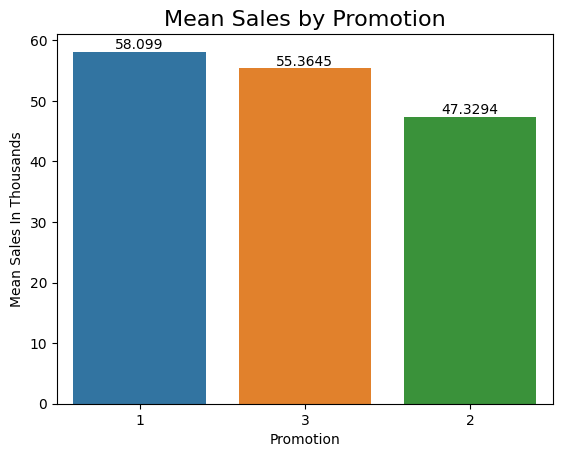

In [ ]:
# Mean sales by Promotion
sales_by_promotion = df2.groupby("Promotion")[
                    "SalesInThousands"].mean().reset_index().sort_values(
                        by="SalesInThousands", ascending=False)
sales_by_promotion["Promotion"] = sales_by_promotion["Promotion"].astype("str")
ax = sns.barplot(x="Promotion", y="SalesInThousands", 
                 data = sales_by_promotion)
ax.bar_label(ax.containers[0])
plt.ylabel("Mean Sales In Thousands")
plt.title("Mean Sales by Promotion", fontsize=16)
plt.show()

In [ ]:
from scipy.stats import f_oneway

# H0: All group means are equal.
# H1: At least one group mean is different.
promo_1 = df2.loc[df2["Promotion"]==1,"SalesInThousands"]
promo_2 = df2.loc[df2["Promotion"]==2,"SalesInThousands"]
promo_3 = df2.loc[df2["Promotion"]==3,"SalesInThousands"]

f_stat, p_value = f_oneway(promo_1,promo_2,promo_3)
print(f"p value: %.4f" % p_value)

p value: 0.0000


**Post-hoc t-Tests**

In [ ]:
from scipy.stats import ttest_ind

# H0: no statistically significant difference between promotion 1 and promotion 2
# H1: significantly difference between promotion 1 and promotion 2
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 2: {promo_1.mean() - promo_2.mean()}")
t_stat, p_value = ttest_ind(promo_1, promo_2)
print(f"p value: %.4f" % p_value)
print("\n")

# H0: no statistically significant difference between promotion 1 and promotion 3
# H1: significantly difference between promotion 1 and promotion 3
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 3: {promo_1.mean() - promo_3.mean()}")
t_stat, p_value = ttest_ind(promo_1, promo_3)
print(f"p value: %.4f" % p_value)
print("\n")

# H0: no statistically significant difference between promotion 2 and promotion 3
# H1: significantly difference between promotion 2 and promotion 3
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 3: {promo_2.mean() - promo_3.mean()}")
t_stat, p_value = ttest_ind(promo_2, promo_3)
print(f"p value: %.4f" % p_value)

Mean difference between Promotion strategy 1 and Promotion strategy 2: 10.76959673428997
p value: 0.0000


Mean difference between Promotion strategy 1 and Promotion strategy 3: 2.734543542800594
p value: 0.1208


Mean difference between Promotion strategy 1 and Promotion strategy 3: -8.035053191489375
p value: 0.0000
